<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

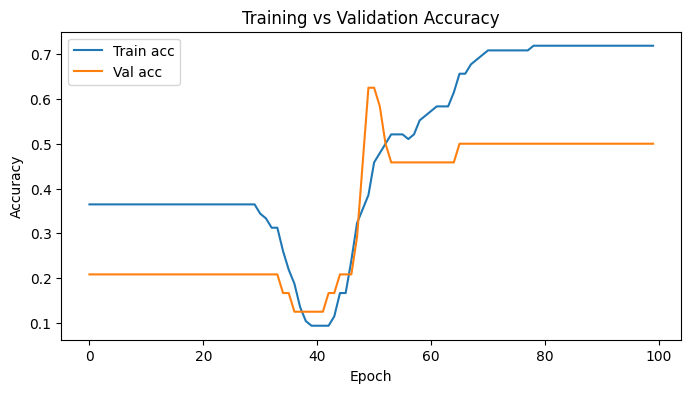

1/1 [==============================] - 0s 105ms/step


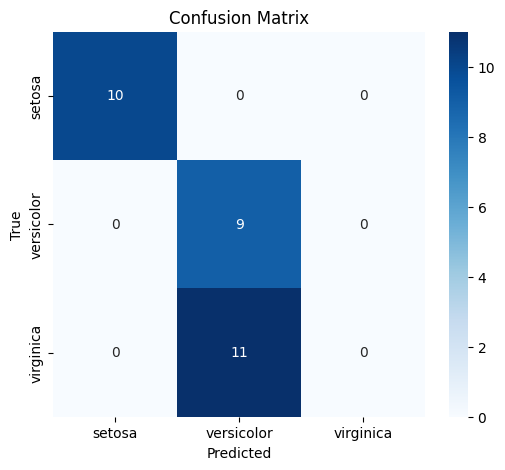

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.45      1.00      0.62         9
   virginica       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30

Sample 0: True = versicolor | Predicted = versicolor
Sample 1: True = setosa     | Predicted = setosa
Sample 2: True = virginica  | Predicted = versicolor
Sample 3: True = versicolor | Predicted = versicolor
Sample 4: True = versicolor | Predicted = versicolor


/Users/mihailbonchev/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mihailbonchev/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mihailbonchev/.pyenv/versions/3.8.2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [7]:
# ============================================
# 1. Imports
# ============================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

# ============================================
# 2. Load and preprocess data
# ============================================
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
class_names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))

print(df.describe)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)
print(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================================
# 3. Build model
# ============================================
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

# ============================================
# 4. Compile
# ============================================
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ============================================
# 5. Train
# ============================================
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    verbose=0
)

# ============================================
# 6. Evaluate
# ============================================
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test accuracy: {accuracy:.3f}")

# ============================================
# 7. Plot training history
# ============================================
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# ============================================
# 8. Confusion Matrix
# ============================================
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ============================================
# 9. Classification Report
# ============================================
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# ============================================
# 10. Inspect some predictions
# ============================================
for i in range(5):
    true_label = class_names[y_true[i]]
    pred_label = class_names[y_pred_classes[i]]
    print(f"Sample {i}: True = {true_label:10s} | Predicted = {pred_label}")
